<a href="https://colab.research.google.com/github/RobertMichuki/RobertMichuki/blob/main/Hypothesis_Testing_for_Autolib_electric_car_sharing_service_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement
We have been tasked to understand electric car usage. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

##Defining the matrics of success
> This project will be considered a success when we are able to perform the following tasks:

>*   Specify the null and alternate hypothesis.
>*   Conduct EDA to uncover underlying patterns within the dataset that can guide the sampling technique.
>*   Perform hypothesis testing and interpret the results.
>*   Provide project summary and conclusions.

#Data Description
The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).
 The dataset and glossary to use for this project can be found here [https://bit.ly/DSCoreAutolibDataset

In [ ]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#loading our data
df = pd.read_csv ('autolib_daily_events_postal_code.csv')
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
#checing for null values
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [34]:
# Since we are interested in learning more about blue cars only
# we can drop all other unnecessary columns

df = df.drop(df.columns[7:], axis=1)
df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


In [37]:
# Renaming columns 

df.columns = ['postal_code', 'date', 'daily_data_points', 'day_of_week', 'day_type', 'total_bluecars_taken', 
                'total_bluecars_returned']
df.head()

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


In [39]:
# Checking for duplicate values 

df.duplicated().any()

False

In [41]:
# Change Date column to datetime type
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [42]:
# Creating a new 'month' attribute

df['month'] = df['date'].dt.month

In [43]:
# Replacing day_of week code with actual names

encode = {"day_of_week" : {0:"monday", 1:"tuesday", 2:"wednesday", 3:"thursday",
                           4:"friday", 5:"saturday", 6:"sunday"}, "month" : {1:"January",
                          2:"February", 3:"March", 4:"April", 5:"May", 6:"June"}}

In [44]:
df.replace(encode, inplace = True)
df.head()

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,month
0,75001,2018-01-01,1440,monday,weekday,110,103,January
1,75001,2018-01-02,1438,tuesday,weekday,98,94,January
2,75001,2018-01-03,1439,wednesday,weekday,138,139,January
3,75001,2018-01-04,1320,thursday,weekday,104,104,January
4,75001,2018-01-05,1440,friday,weekday,114,117,January


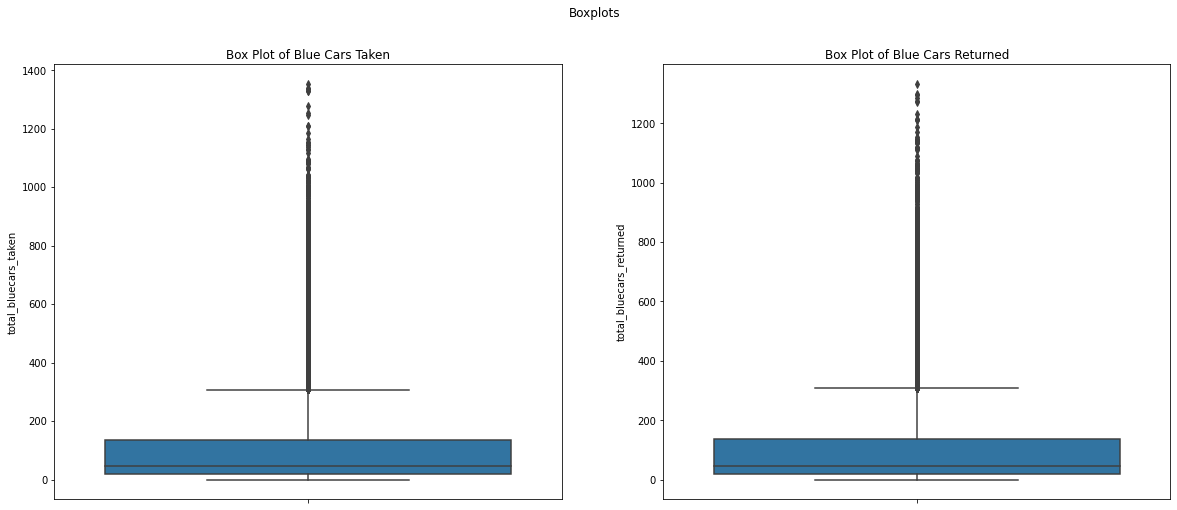

In [47]:
# Checking for Outliers

fig, ax = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('Boxplots')
sn.boxplot(data=df, y = "total_bluecars_taken", ax=ax[0])
ax[0].set_title('Box Plot of Blue Cars Taken')
sn.boxplot(data=df, y = "total_bluecars_returned", ax=ax[1])
ax[1].set_title('Box Plot of Blue Cars Returned')


plt.show()


There are quite alot of  'outliers' in the dataset for the number of blue cars taken and returned. I choose not to remove the outliers since there is no evidence of the being erraneous records 

In [48]:
# Checking for Anomalies
# 'blue cars taken' variable

q1_taken = df['total_bluecars_taken'].quantile(.25)
q3_taken = df['total_bluecars_taken'].quantile(.75)

iqr_taken = q3_taken - q1_taken

# 'blue cars returned' variable
q1_returned = df['total_bluecars_returned'].quantile(.25)
q3_returned = df['total_bluecars_returned'].quantile(.75)

iqr_returned = q3_returned - q1_returned

# 'available data points' variable
q1_points = df['daily_data_points'].quantile(.25)
q3_points = df['daily_data_points'].quantile(.75)

iqr_points = q3_points - q1_points

print(iqr_taken, iqr_returned, iqr_points) 


115.0 115.0 1.0


The results show that the blue cars taken and blue cars returned attributes both have 115 records that are not within the Quantile 2 of the records in those columns.only one record is on the 3rd quantile



#Univariate  Analysis

In [50]:
# frequency table for the postal code attribute

df.postal_code.value_counts()

75001    156
92700    156
93350    156
93310    156
93260    156
        ... 
93440    151
93370    149
92340    147
93200    126
93390     84
Name: postal_code, Length: 104, dtype: int64

In [51]:
# How often does each day of the week appear?

df.day_of_week.value_counts()

monday       2374
tuesday      2363
sunday       2274
friday       2271
wednesday    2268
thursday     2268
saturday     2267
Name: day_of_week, dtype: int64

In [52]:
# How often does each day type appear?

df.day_type.value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

###measuring central tendacy


In [54]:
#mean of total_bluecars_taken
df.total_bluecars_taken.mean()

125.92695057506994

In [57]:
#mean of total_bluecars_returned
df.total_bluecars_returned .mean()

125.912713708424

In [55]:
#mode of BlueCars_taken_sum
df.total_bluecars_taken.mode()

0    12
dtype: int64

In [58]:
#mode of total_bluecars_returned
df.total_bluecars_returned .mode()

0    13
dtype: int64

In [56]:
# median of BlueCars_taken_sum
df.total_bluecars_taken.median()

46.0

In [59]:
#median of total_bluecars_returned
df.total_bluecars_returned .median()

46.0

#Measures of Dispersion

In [62]:
# standard deviation for total_bluecars_taken
df.total_bluecars_taken.std()

185.42657876727876

In [67]:
# standard deviation for total_bluecars_returned
df.total_bluecars_returned.std()

185.50153480148342

In [63]:
#variance of total_bluecars_taken
df.total_bluecars_taken.var()

34383.01611333783

In [68]:
# var deviation for total_bluecars_returned
df.total_bluecars_returned.var()

34410.81941370596

In [64]:
#skewness for total_bluecars_taken
df.total_bluecars_taken.skew()

2.4063548974959086

In [69]:
# skewness   for total_bluecars_returned
df.total_bluecars_returned.skew()

2.412084978838923

In [65]:
#kurtosis for total_bluecars_taken
df.total_bluecars_taken.kurt()

6.172692305510042

In [70]:
# kurtosis   for total_bluecars_returned
df.total_bluecars_returned.kurt()

6.1862880957582345

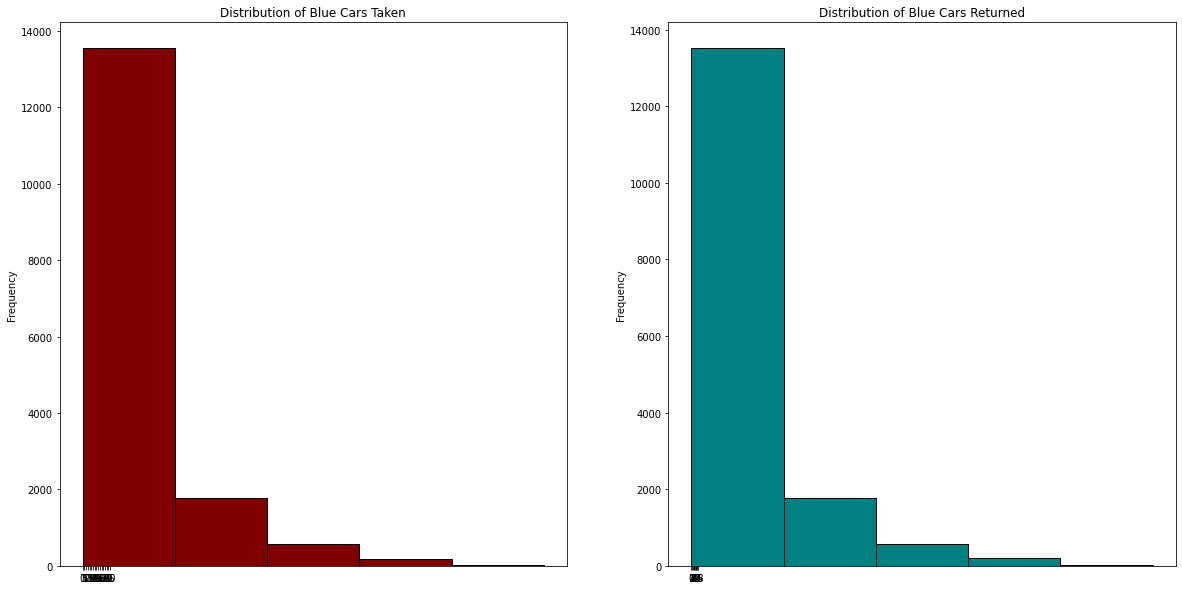

In [60]:
# plotting histograms to show the distribution of blue cars taken and returned

fig,ax=plt.subplots(1,2,figsize=(20,10))
df['total_bluecars_taken'].plot.hist(ax=ax[0],bins=5,edgecolor='black',color='maroon')
ax[0].set_title('Distribution of Blue Cars Taken')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df['total_bluecars_returned'].plot.hist(ax=ax[1],color='teal',bins=5,edgecolor='black')
ax[1].set_title('Distribution of Blue Cars Returned')
x2=list(range(0,20,2))
ax[1].set_xticks(x2)
plt.show()

From the above distribution we can see that both plots are  not normaly distributed but are skewed to the left

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


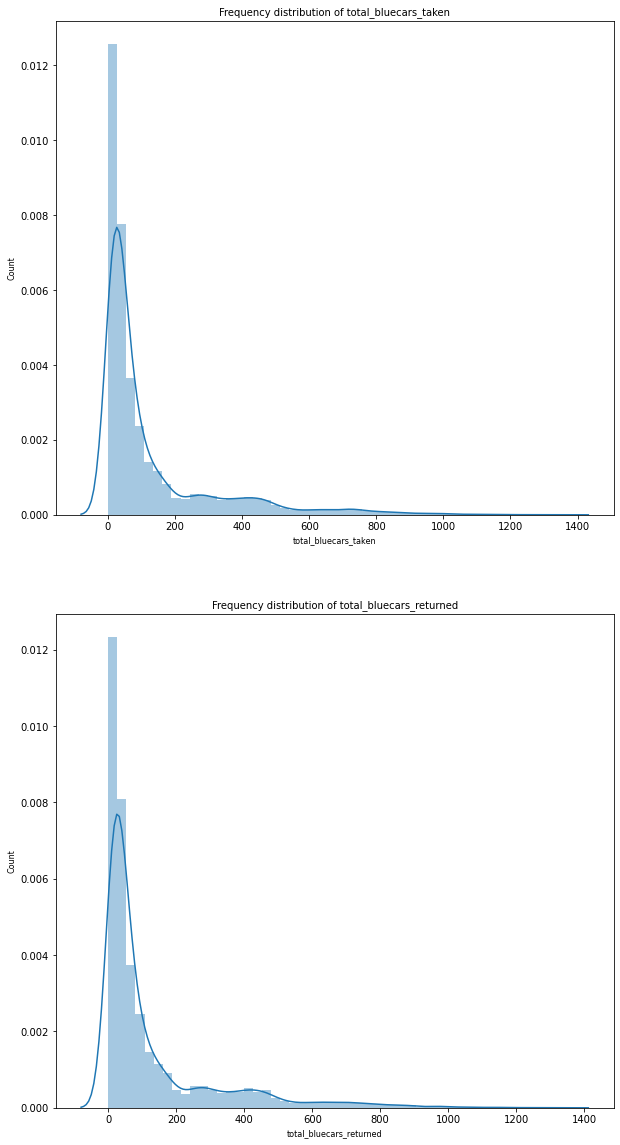

In [61]:
# Frequency distribution plots

col_names = ['total_bluecars_taken','total_bluecars_returned']
fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sn.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()


Text(0.5, 0, 'BlueCars_taken_sum')

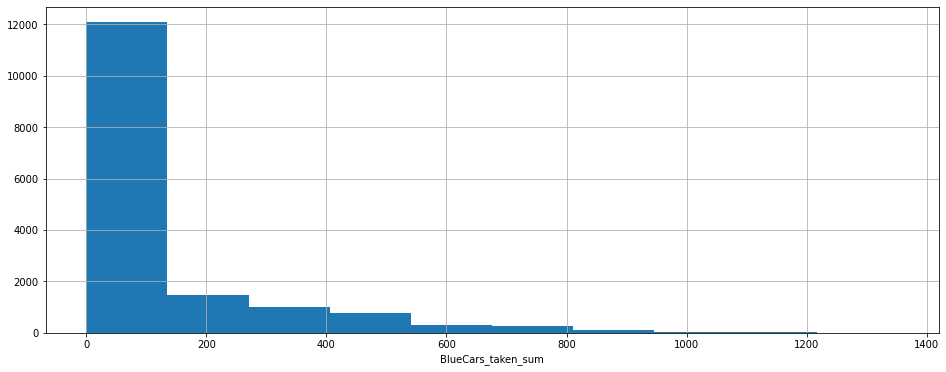

In [8]:
plt.figure(figsize=(16, 6))
df.BlueCars_taken_sum.hist() 
plt.xlabel('BlueCars_taken_sum')

From the above distribution we can see that BlueCars_taken_sum is not normaly distributed with an average of 125

#Bivariate Analysis

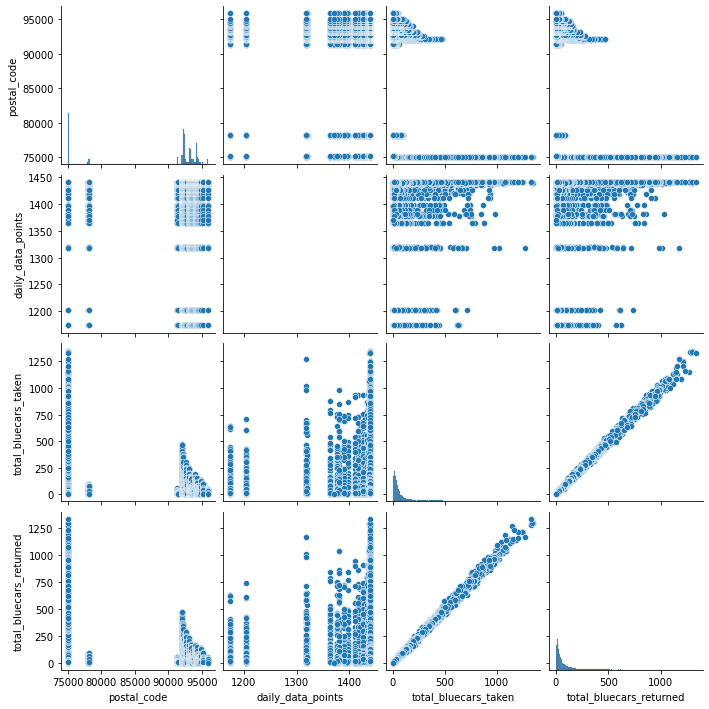

In [72]:
# Ploting the bivariate summaries 

sn.pairplot(df)
plt.show()


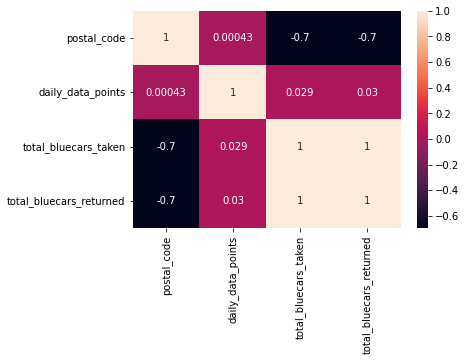

In [73]:
# Plotting the Pearson correlation coefficient among numeric variables


sn.heatmap(df.corr(),annot=True)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(12.331250000000004, 0.5, 'Blue Cars Returned')

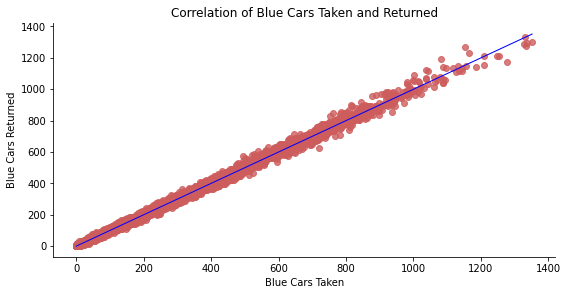

In [74]:
# scatter plot of blue cars taken and blue cars returned

sn.lmplot('total_bluecars_taken', "total_bluecars_returned", df, scatter_kws={'marker':'o', 'color': 'indianred'}, 
           line_kws={'linewidth':1,'color':'blue'}, height = 4, aspect = 2)

plt.title("Correlation of Blue Cars Taken and Returned")
plt.xlabel('Blue Cars Taken')
plt.ylabel("Blue Cars Returned")

We can see from the plot that total_bluecars_taken is directtly propotional to total_bluecars_returned

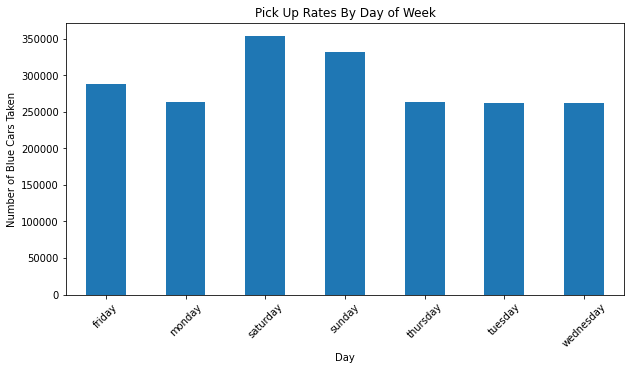

In [75]:
# Bar chart showing total number of blue cars picked up by day of week

df.groupby('day_of_week')['total_bluecars_taken'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.ylabel("Number of Blue Cars Taken")
plt.title("Pick Up Rates By Day of Week")
plt.show()

The pick up rate for blue cars is higher on weekends 

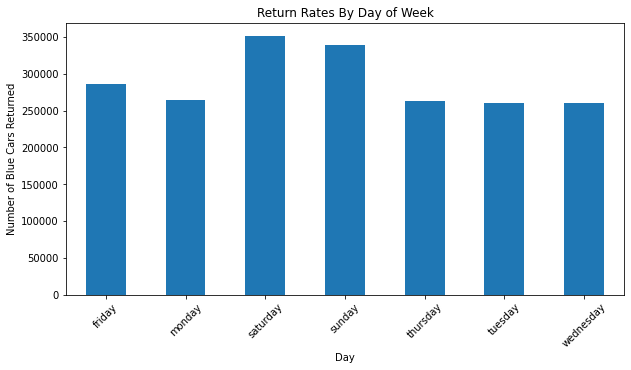

In [76]:
# Bar chart showing total number of blue cars returned   by day of week

df.groupby('day_of_week')['total_bluecars_returned'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.ylabel("Number of Blue Cars Returned")
plt.title("Return Rates By Day of Week")
plt.show()

The return rate for blue cars is higher on weekends

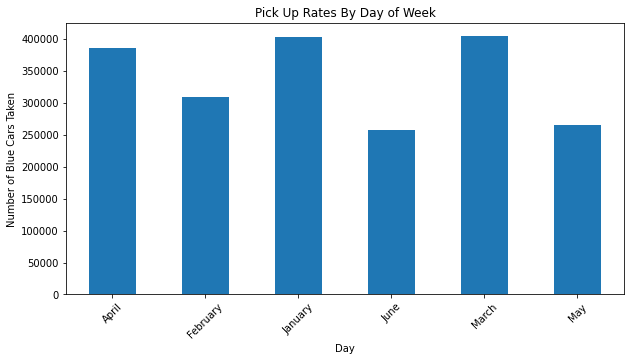

In [77]:
# Bar chart showing total number of blue cars picked up by month

df.groupby('month')['total_bluecars_taken'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.ylabel("Number of Blue Cars Taken")
plt.title("Pick Up Rates By Day of Week")
plt.show()

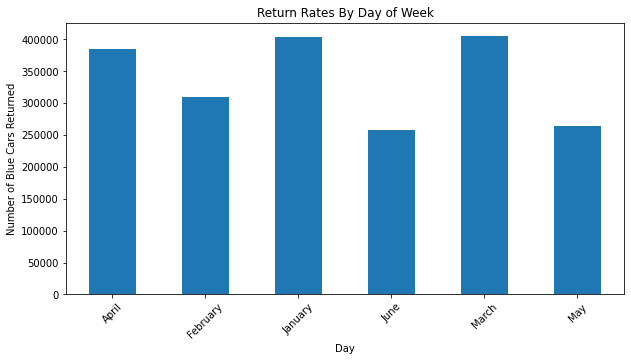

In [78]:
# Bar chart showing total number of blue cars returned   by month

df.groupby('month')['total_bluecars_returned'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.ylabel("Number of Blue Cars Returned")
plt.title("Return Rates By Day of Week")
plt.show()

#Hypothesis Testing
### Specifying the question
Null Hypothesis: For both Paris and Essonne the average number of blue cars picked up during weekends is the same.

Ho : μ1 = μ2 (where μ1 is the mean for Paris and μ2 is the mean for Essonne)

Alternate Hypothesis: The average number of blue cars picked up during the weekend is not the same for Paris and Essonne.

Ha : μ1 ≠ μ2

In [79]:
# Checking all unique postal codes in the dataset

df['postal_code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [80]:
# Coding all postal codes with the city they represent

# create a list of our conditions
conditions = [
    (df['postal_code'] >= 75000) & (df['postal_code'] <= 75999),
    (df['postal_code'] >= 78000) & (df['postal_code'] <= 78999),
    (df['postal_code'] >= 91000) & (df['postal_code'] <= 91999),
    (df['postal_code'] >= 92000) & (df['postal_code'] <= 92999),
    (df['postal_code'] >= 93000) & (df['postal_code'] <= 93999),
    (df['postal_code'] >= 94000) & (df['postal_code'] <= 94999),
    (df['postal_code'] >= 95000) & (df['postal_code'] <= 95999),
    ]

# create a list of the values we want to assign for each condition
values = ['Paris', 'Yvelines', 'Essonne', 'Hauts-de-Seine', 'Seine-Saint_Denis', 'Val-de-Marne', 'Val-dOise']

# create a new column and use np.select to assign values to it using our lists as arguments
df['city'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,month,city
0,75001,2018-01-01,1440,monday,weekday,110,103,January,Paris
1,75001,2018-01-02,1438,tuesday,weekday,98,94,January,Paris
2,75001,2018-01-03,1439,wednesday,weekday,138,139,January,Paris
3,75001,2018-01-04,1320,thursday,weekday,104,104,January,Paris
4,75001,2018-01-05,1440,friday,weekday,114,117,January,Paris


##Sampling approach

Since we are comparing  samples from two different cities  stratified random sampling is the best sampling technique to use.

In [83]:
# Creating a new dataframe with only Paris and Hauts-de-Seine
# and only weekend records which is the target records

df_sample= df.loc[df['city'].isin(['Paris','Essonne']) & df['day_type'].isin(['weekend'])]
df_sample

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,month,city
5,75001,2018-01-06,1437,saturday,weekend,187,185,January,Paris
6,75001,2018-01-07,1440,sunday,weekend,180,180,January,Paris
12,75001,2018-01-13,1440,saturday,weekend,224,223,January,Paris
13,75001,2018-01-14,1440,sunday,weekend,193,193,January,Paris
19,75001,2018-01-20,1439,saturday,weekend,217,217,January,Paris
...,...,...,...,...,...,...,...,...,...
4350,91400,2018-06-03,1440,sunday,weekend,12,13,June,Essonne
4356,91400,2018-06-09,1440,saturday,weekend,13,11,June,Essonne
4357,91400,2018-06-10,1440,sunday,weekend,4,4,June,Essonne
4363,91400,2018-06-16,1440,saturday,weekend,9,10,June,Essonne


In [84]:
#previewing top sample data 
df_sample.head()

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,month,city
5,75001,2018-01-06,1437,saturday,weekend,187,185,January,Paris
6,75001,2018-01-07,1440,sunday,weekend,180,180,January,Paris
12,75001,2018-01-13,1440,saturday,weekend,224,223,January,Paris
13,75001,2018-01-14,1440,sunday,weekend,193,193,January,Paris
19,75001,2018-01-20,1439,saturday,weekend,217,217,January,Paris


In [86]:
# Checking the distribution of usage/records by city

df_sample['city'].value_counts()

Paris      968
Essonne    132
Name: city, dtype: int64

In [87]:
# We will choose a sample size of 10% of all target records

sample = df_sample.groupby('city', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the stratified sample
print(sample['city'].value_counts())

# Check the stratified output
print(sample)

Paris      97
Essonne    13
Name: city, dtype: int64
      postal_code       date  daily_data_points day_of_week day_type  \
4006        91330 2018-04-21               1440    saturday  weekend   
3905        91330 2018-01-07               1440      sunday  weekend   
4252        91400 2018-02-11               1440      sunday  weekend   
4187        91370 2018-05-27               1440      sunday  weekend   
4270        91400 2018-03-04               1440      sunday  weekend   
...           ...        ...                ...         ...      ...   
204         75002 2018-02-18               1438      sunday  weekend   
1140        75008 2018-02-18               1438      sunday  weekend   
2143        75014 2018-04-29               1440      sunday  weekend   
3116        75020 2018-06-16               1440    saturday  weekend   
2866        75019 2018-03-03               1440    saturday  weekend   

      total_bluecars_taken  total_bluecars_returned     month     city  
4006     

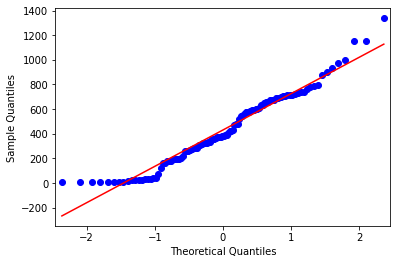

In [88]:
# Performing normality test on the sample selected

from statsmodels.graphics.gofplots import qqplot

# q-q plot

qqplot(sample['total_bluecars_taken'], line='s')
plt.show()

###For  hypothesis testing, we will use a two sample z-test and p-value to either reject or accept the null hypothesis since aour sample is greater than 30.

In [89]:
#define the two samples 
Paris = sample[(sample['city'] == 'Paris')]
Essonne = sample[(sample['city'] == 'Essonne')]

print(Paris)
print(Essonne)

      postal_code       date  daily_data_points day_of_week day_type  \
2725        75018 2018-03-18               1440      sunday  weekend   
1002        75007 2018-03-11               1440      sunday  weekend   
3036        75020 2018-03-17               1440    saturday  weekend   
2523        75017 2018-01-28               1440      sunday  weekend   
1044        75007 2018-04-22               1440      sunday  weekend   
...           ...        ...                ...         ...      ...   
204         75002 2018-02-18               1438      sunday  weekend   
1140        75008 2018-02-18               1438      sunday  weekend   
2143        75014 2018-04-29               1440      sunday  weekend   
3116        75020 2018-06-16               1440    saturday  weekend   
2866        75019 2018-03-03               1440    saturday  weekend   

      total_bluecars_taken  total_bluecars_returned     month   city  
2725                   546                      568     March  P

In [95]:
# Next, we calculate the z-score and p value

from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval1 = stests.ztest(x1=Paris['total_bluecars_taken'], x2=Essonne['total_bluecars_taken'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.025:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

8.376453894258129e-10
Reject Null Hypothesis


In [96]:
print(ztest)

6.1376245553932005


We can see that the p-value from the  sample z-test is less than 0.05 therefore we reject the null hypothesis

#Hypothesis Testing Results and Interpretation


We calculated the p value of the two sample z test and found that the p values is 8.376453894258129e-10 which is much less than 0.05. Therefore, we reject the null hypothesis. This means that the average number of blue cars picked up on weekends is not the same for Paris and that for Essonne. 



##Summary and Conclusions

We have successfully defined the null and alternate hypothesis, executed the sampling technique and carried out hypothesis testing which led to the rejection of the null hypothesis. We concluded that the average number of blue cars picked up in Essonne is not the same as that in Paris.